In [ ]:
import pandas as pd
import numpy as np
import re
from IPython.display import HTML

import matplotlib as mpl
from matplotlib import pyplot as plt, cm, animation

In [ ]:
from dotenv import dotenv_values
from pathlib import Path
config = dotenv_values('.config')
data_path = Path(config['DATA_PATH'])
dataset_path = data_path/'processed/v1'
visualization_path = data_path/'visualizations'

In [ ]:
landmark_ds = pd.read_csv(dataset_path/'Landmark Dataset.csv')
landmark_ds

,HANDEDNESS,SCORE,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,...,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,IS_Y
0,Left,0.998447,0.426867,0.726470,-3.355244e-07,0.475085,0.737292,-0.023625,0.528597,0.722908,...,0.418943,0.521020,-0.062958,0.412330,0.489451,-0.069021,0.409425,0.455898,-0.068255,True
1,Left,0.996158,0.420599,0.726238,-4.918656e-07,0.480033,0.741861,-0.022575,0.530826,0.722220,...,0.407161,0.489169,-0.051421,0.394217,0.445800,-0.055259,0.384253,0.403706,-0.054308,True
2,Left,0.993747,0.415386,0.717941,-5.488089e-07,0.476937,0.729452,-0.019920,0.530574,0.707565,...,0.401667,0.481976,-0.053663,0.387381,0.442011,-0.057296,0.374988,0.402892,-0.056446,True
3,Left,0.998626,0.425512,0.706939,-4.548655e-07,0.471253,0.712519,-0.023218,0.519977,0.688662,...,0.401670,0.494613,-0.055310,0.389583,0.461724,-0.059701,0.380573,0.425952,-0.058264,True
4,Left,0.993242,0.412173,0.703998,-5.492765e-07,0.473183,0.716121,-0.019831,0.526339,0.695925,...,0.398462,0.470240,-0.052493,0.383506,0.429724,-0.056155,0.371041,0.387607,-0.055224,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,Right,0.998665,0.682950,0.863219,-6.253512e-07,0.617191,0.843722,-0.011635,0.562743,0.784395,...,0.667021,0.612406,-0.030781,0.664994,0.678968,-0.019838,0.672989,0.699233,-0.006584,False
6817,Right,0.998455,0.683229,0.863022,-6.309974e-07,0.618180,0.844347,-0.010643,0.562980,0.784930,...,0.666417,0.612385,-0.032350,0.664423,0.678974,-0.021458,0.672791,0.699167,-0.008306,False
6818,Right,0.998610,0.683107,0.864352,-6.302539e-07,0.618879,0.846128,-0.011700,0.564296,0.787640,...,0.667158,0.614894,-0.032611,0.664829,0.680746,-0.021465,0.672903,0.700075,-0.008132,False
6819,Right,0.998744,0.683921,0.861343,-6.297710e-07,0.618447,0.842592,-0.011938,0.564191,0.785130,...,0.667187,0.614505,-0.033101,0.665571,0.679846,-0.022016,0.673722,0.697112,-0.008661,False


In [ ]:
def split_kp_name(text:str):
    found = re.findall('(\w+)_([XYZ])', text)
    if not len(found):
        return None
    return found[0]

split_kp_name('WRIST_X')

('WRIST', 'X')

In [ ]:
hand_df = landmark_ds.iloc[:, 2:-1]
# hand_df

In [ ]:
hand_lines = np.array([
    [0, 1, 2, 3, 4],
    [0, 5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [0, 17, 18, 19, 20],
    [5, 9, 13, 17]
], dtype=object)
# hand_lines.dtype = (np.int32)


def plot_hand(ax: plt.Axes, hand: np.array):
    c = np.zeros((21, 3)).tolist()

    # Palm
    c[0][0] = 1
    c[5][0] = 1
    c[9][0] = 1
    c[13][0] = 1
    c[17][0] = 1

    # Fingertips
    c[4][1] = 1  # Thumb
    c[8][2] = 1
    c[12][2] = 1
    c[16][2] = 1
    c[20][2] = 1

    for lines in hand_lines:
        ax.plot(hand[0][lines], hand[1][lines], hand[2][lines], c=(0, 0, 0))
        ax.scatter(hand[0], hand[1], hand[2], c=c)
        ax.view_init(azim=-270, elev=90)


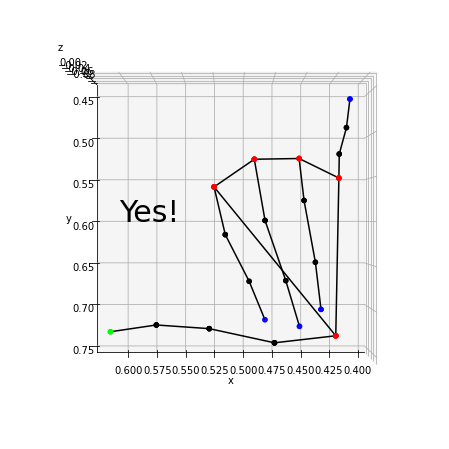

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax: plt.Axes = fig.add_subplot(projection='3d')
i, hand = next(hand_df.iterrows())
hand = hand.values.reshape((-1, 3)).T

plot_hand(ax, hand)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text(.6, .6, 0, 'Yes!', fontsize=30)
plt.show()

In [ ]:
FPS = 10


fig = plt.figure(figsize=(10, 10))
ax: plt.Axes = fig.add_subplot(projection='3d')


def draw_hand(frame):
    i, row = frame

    score = row.iat[1]
    is_y = row.iat[-1]
    hand = row.iloc[2:-1]
    hand = hand.values.reshape((-1, 3)).T
    ax.clear()
    plot_hand(ax, hand)
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    ax.set_zlim((-1, 1))
    ax.text(1, 1.12, -.5, f'frame: {i}', fontsize=13)
    ax.text(1, 1.18, -.5, f'class: {is_y}', fontsize=13)
    ax.text(1, 1.24, -.5, f'confident: {score:.2f}', fontsize=13)


anime = animation.FuncAnimation(
    fig, draw_hand, frames=landmark_ds.loc[3500:].iterrows(), interval=1000/FPS,
    save_count=len(hand_df.index)
)
plt.close()

In [ ]:
anime.save(f'{str(visualization_path)}/anim8.mp4', writer='ffmpeg')

In [ ]:
# landmark_ds.drop(landmark_ds.loc[1823:1838].index).to_csv('Landmark Dataset.csv', index=None)